In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Таблица истинности

In [2]:
data = {
    'X1': [0, 0, 1, 1],
    'X2': [0, 1, 0, 1],
    'AND': [0, 0, 0, 1],
    'OR': [0, 1, 1, 1]
}
df = pd.DataFrame(data)
display(df)

,X1,X2,AND,OR
0,0,0,0,0
1,0,1,0,1
2,1,0,0,1
3,1,1,1,1


### Инициализация весов и смещения

In [3]:
np.random.seed(42)
weights = np.random.rand(2)
bias = np.random.rand(1)
learning_rate = 0.1

### Инициализация функций методов обучения и визуализации

In [4]:
'''Классическое обучение перцептрона'''
def classical_training(X, Y, epochs_or_mae):
    global weights, bias
    w_history = [weights.copy()]
    b_history = [bias.copy()]
    if epochs_or_mae == "MAE":
        threshold = 0.1
        epoch = 0
        while True:
            total_error = 0
            for x1, x2, y in zip(X['X1'], X['X2'], Y):
                x = np.array([x1, x2])
                y_pred = step(np.dot(weights, x) + bias)
                error = y - y_pred
                total_error += abs(error)
                weights += learning_rate * error * x
                bias += learning_rate * error
            w_history.append(weights.copy())
            b_history.append(bias.copy())
            if total_error / len(X) < threshold:
                break
            epoch += 1
        return w_history, b_history, epoch
    else:
        epochs = int(epochs_or_mae)
        for epoch in range(epochs):
            for x1, x2, y in zip(X['X1'], X['X2'], Y):
                x = np.array([x1, x2])
                y_pred = step(np.dot(weights, x) + bias)
                error = y - y_pred
                weights += learning_rate * error * x
                bias += learning_rate * error
            w_history.append(weights.copy())
            b_history.append(bias.copy())
        return w_history, b_history, epochs

'''Обучение методом Хебба'''
def hebbian_training(X, Y):
    global weights, bias
    for x1, x2, y in zip(X['X1'], X['X2'], Y):
        x = np.array([x1, x2])
        weights += learning_rate * y * x
        bias += learning_rate * y
    return weights, bias

'''Ступенчатая функция активации'''
def step(x):
    return 1 if x >= 0 else 0

'''Визуализация'''
def visualize(X, results_df, epochs):
    if not results_df[results_df['Эпохи'] == epochs].empty:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        for idx, row in results_df[results_df['Эпохи'] == epochs].iterrows():
            task = row['Задача']
            weights = row['Итоговые веса']
            bias = row['Итоговое смещение']
            method = row['Метод']

            X_vis, Y_vis = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
            Z = np.zeros_like(X_vis)
            for i in range(X_vis.shape[0]):
                for j in range(X_vis.shape[1]):
                    x = np.array([X_vis[i, j], Y_vis[i, j]])
                    Z[i, j] = step(np.dot(weights, x) + bias)

            ax.plot_surface(X_vis, Y_vis, Z, label=f'{task} ({method}, {epochs} эпох)')

        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Выход')
        ax.set_title(f'Граница решения ({epochs} эпох)')
        ax.legend()
        plt.show()
    else:
        print(f"Нет данных для {epochs} эпох в текущем DataFrame.")

### Классическое обучение

In [5]:
epochs_list = [10, 50, 100]
results = []

for task in ['AND', 'OR']:
    for epochs in epochs_list:
        weights = np.random.rand(2)
        bias = np.random.rand(1)
        w_hist, b_hist, epochs_trained = classical_training(df[['X1', 'X2']], df[task], epochs)
        results.append(
            {
                'Задача': task,
                'Метод': 'Классический',
                'Эпохи': epochs_trained,
                'Итоговые веса': w_hist[-1],
                'Итоговое смещение': b_hist[-1]
            }
        )

results_df = pd.DataFrame(results)
display(results_df)

,Задача,Метод,Эпохи,Итоговые веса,Итоговое смещение
0,AND,Классический,10,"[0.29865848419703667, 0.05601864044243651]",[-0.34400547966379735]
1,AND,Классический,50,"[0.05808361216819946, 0.3661761457749353]",[-0.3988849882567912]
2,AND,Классический,100,"[0.20807257779604557, 0.12058449429580242]",[-0.23009014783800555]
3,OR,Классический,10,"[0.8324426408004217, 0.21233911067827616]",[-0.018175032792899393]
4,OR,Классический,50,"[0.18340450985343382, 0.3042422429595377]",[-0.07524356836776214]
5,OR,Классический,100,"[0.43194501864211576, 0.2912291401980419]",[-0.08814710527762049]


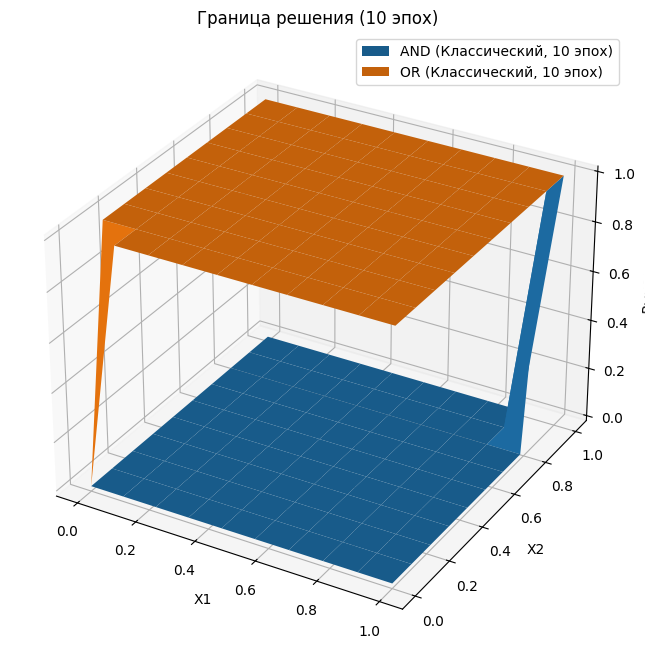

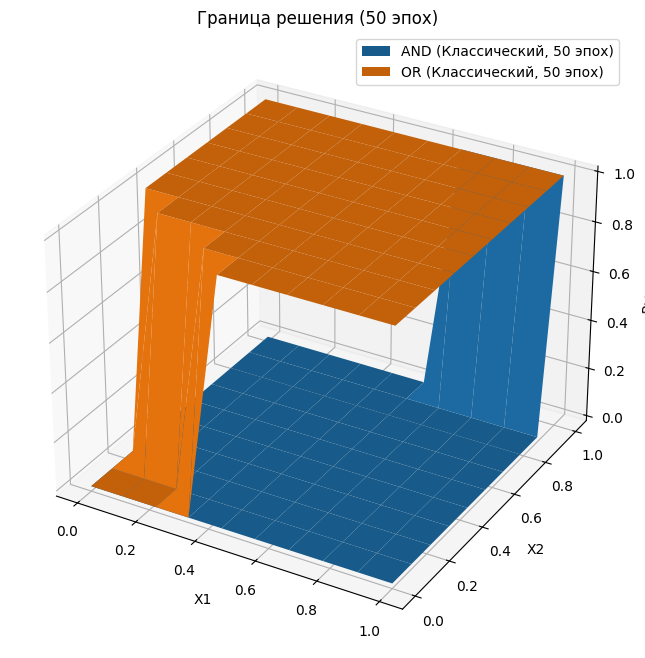

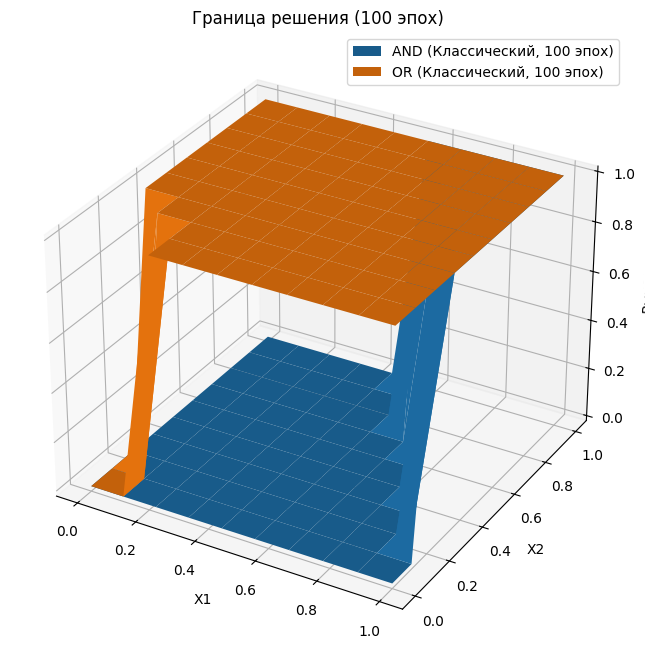

In [6]:
for epochs in epochs_list:
    visualize(df[['X1', 'X2']], results_df, epochs)

### Обучение по правилу Хебба

In [7]:
weights = np.random.rand(2)
bias = np.random.rand(1)
results = []

for task in ['AND', 'OR']:
    w_final, b_final = hebbian_training(df[['X1', 'X2']], df[task])
    print(f"Задача: {task}, Итоговые веса: {w_final}, Итоговое смещение: {b_final}")  # Диагностика
    results.append(
        {
            'Задача': task, 
            'Метод': 'Хебб', 
            'Эпохи': 1,
            'Итоговые веса': w_final, 
            'Итоговое смещение': b_final
        }
    )
    
results_df = pd.DataFrame(results)
display(results_df)

Задача: AND, Итоговые веса: [0.23949386 0.39214465], Итоговое смещение: [0.46636184]
Задача: OR, Итоговые веса: [0.43949386 0.59214465], Итоговое смещение: [0.76636184]


,Задача,Метод,Эпохи,Итоговые веса,Итоговое смещение
0,AND,Хебб,1,"[0.4394938606520419, 0.5921446485352181]",[0.7663618432936916]
1,OR,Хебб,1,"[0.4394938606520419, 0.5921446485352181]",[0.7663618432936916]


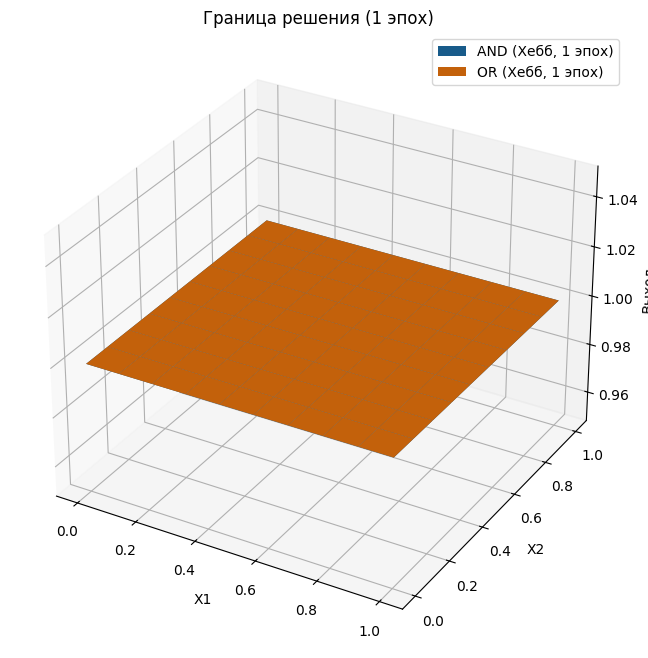

In [8]:
visualize(df[['X1', 'X2']], results_df, 1)

### Обучение до достижения порогового MAE

In [9]:
weights = np.random.rand(2)
bias = np.random.rand(1)
results = []
for task in ['AND', 'OR']:
    w_hist, b_hist, epochs_trained = classical_training(df[['X1', 'X2']], df[task], "MAE")
    results.append(
        {
            'Задача': task,
            'Метод': 'MAE',
            'Эпохи': 1,
            'Итоговые веса': w_hist[-1],
            'Итоговое смещение': b_hist[-1]
        }
    )
results_df = pd.DataFrame(results)
display(results_df)

,Задача,Метод,Эпохи,Итоговые веса,Итоговое смещение
0,AND,MAE,1,"[0.256069984217036, 0.3851759613930137]",[-0.5003262178416402]
1,OR,MAE,1,"[0.35606998421703595, 0.48517596139301367]",[-0.30032621784164026]


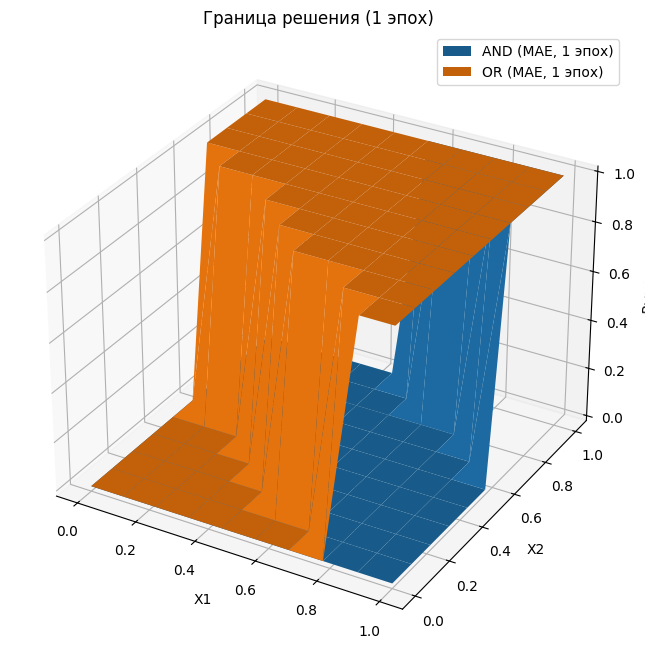

In [10]:
visualize(df[['X1', 'X2']], results_df, 1)